[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_indepth.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: The `multimin` Module in depth

This notebook demonstrates how to use the `multimin.multimin` module for handling multidimensional distributions, specifically designed for asteroid population analysis.

## Installation

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
import os
import matplotlib.pyplot as plt
os.makedirs('gallery', exist_ok=True)
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


## Load the Package

Import `multimin.multimin` and other required libraries:

In [2]:
import pandas as pd
import numpy as np
import multimin as mn
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

Welcome to MultiMin v0.5.0


Read data:

In [3]:
df_neas=pd.read_json(mn.Util.get_data("nea_data.json.gz"))
df_neas["q"]=df_neas["a"]*(1-df_neas["e"])
data_neas=np.array(df_neas[["q","e","i"]])
len(data_neas)

40761

Transform to unbound:

In [4]:
scales=[1.35,1.00,180.0]
udata=np.zeros_like(data_neas)
for i in range(len(data_neas)):
    udata[i]=mn.Util.t_if(data_neas[i],scales,mn.Util.f2u)

Corner plot of data:

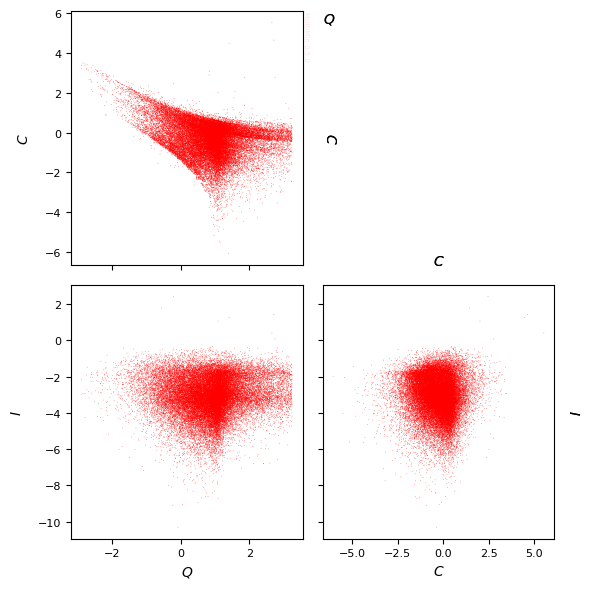

In [5]:
properties=dict(
    Q=dict(label=r"$Q$",range=None),
    E=dict(label=r"$C$",range=None),
    I=dict(label=r"$I$",range=None),
)
G=mn.CornerPlot(properties,figsize=3)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(udata,**sargs)

plt.savefig('gallery/multimin_indepth_1.png')


You can also make a 2-D histogram:

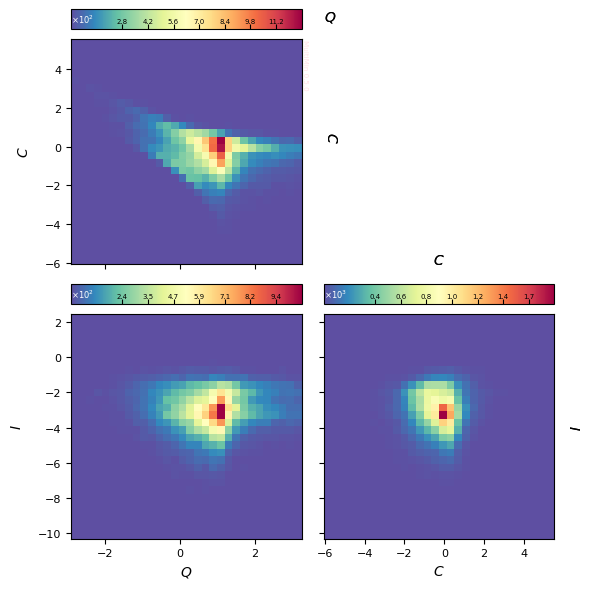

In [6]:
G=mn.CornerPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(udata,colorbar=True,**hargs)

plt.savefig('gallery/multimin_indepth_2.png')


Create a *Composed multinormal*:

In [7]:
CMND=mn.ComposedMultiVariateNormal(Ngauss=1,Nvars=2)
print(CMND)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 2 random variables:
    Weights: [1.0]
    Number of variables: 2
    Averages (μ): [[0, 0]]
    Standard deviations (σ): [[1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,μ1_1,μ1_2,Σ1_11,Σ1_12,Σ1_22]
            [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (6):
            [p1,μ1_1,μ1_2,σ1_1,σ1_2,ρ1_12]
            [1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


Generate a sample:

In [8]:
sample = CMND.rvs(10000)

Show sample:

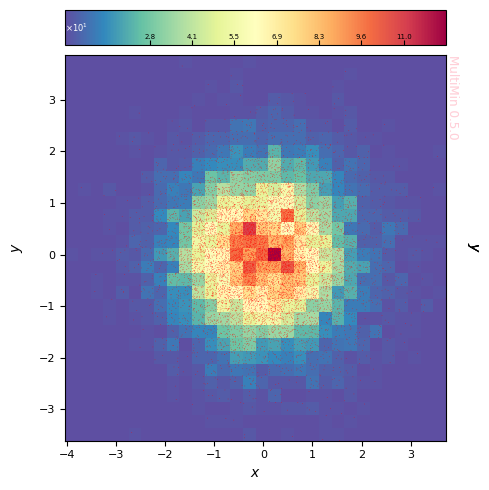

In [9]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=mn.CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig('gallery/multimin_indepth_3.png')


Now create a true *composed distribution*:

You may created specifying each parameter:

In [10]:
weights=[0.1,0.9]
mus=[[0,0],[5,5]]
Sigmas=[[[1,0.2],[0,1]],[[1,0],[0,1]]]
MND=mn.ComposedMultiVariateNormal(mus=mus,weights=weights,Sigmas=Sigmas)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0, 0], [5, 5]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


Or, you may do it using a flat list of parameters:

In [11]:
params=[0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
MND=mn.ComposedMultiVariateNormal(params=params,Nvars=2)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


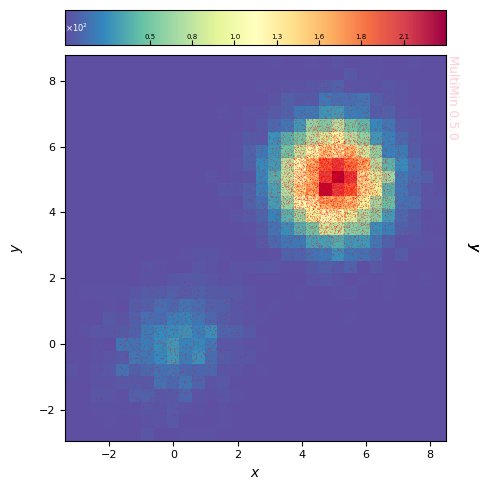

In [12]:
sample = MND.rvs(10000)
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=mn.CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig('gallery/multimin_indepth_4.png')


## Fitting data to a composed multinormal distribution 

Create the fitting object:

In [13]:
F=mn.FitCMND(Ngauss=1,Nvars=3)

The fitting object create a test CMND:

In [14]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0, 0, 0]]
    Standard deviations (σ): [[1.0, 1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0, 0.0, 0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (10):
            [p1,μ1_1,μ1_2,μ1_3,σ1_1,σ1_2,σ1_3,ρ1_12,ρ1_13,ρ1_23]
            [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]


Let's make a minimization:

In [15]:
t = mn.Util.el_time(0)
F.fit_data(udata,verbose=False,advance=1)
t = mn.Util.el_time()
print(f"-log(L)/N = {F.solution.fun/len(udata)}")

Iterations:
Iter 0:
	Vars: [2.6, 1.7, -1.6, -1.2, -1.1, -1.5, 2.3, 1.7, 1.9]
	LogL/N: 5.462908313970585
Iter 1:
	Vars: [2.5, 1.4, -2.1, -1.2, -1.2, -1.6, 2.2, 1.9, 1.7]
	LogL/N: 5.296785041339669
Iter 2:
	Vars: [2.3, 0.9, -2.3, -1.3, -1.5, -1.7, 2, 1.7, 1.5]
	LogL/N: 5.119014953398589
Iter 3:
	Vars: [0.89, -0.53, -3.1, -1.8, -2.1, -1.9, 0.68, 0.95, 0.94]
	LogL/N: 4.3855492641247205
Iter 4:
	Vars: [0.82, -0.49, -3.1, -2.2, -2.2, -2, -0.0057, 0.26, 0.53]
	LogL/N: 4.122268667277914
Iter 5:
	Vars: [0.89, -0.41, -3, -2.4, -2.3, -2.1, -0.59, 0.072, -0.015]
	LogL/N: 3.9803102649010924
Iter 6:
	Vars: [0.9, -0.37, -3, -2.4, -2.3, -2.1, -0.63, 0.091, -0.12]
	LogL/N: 3.972004903055187
Iter 7:
	Vars: [0.88, -0.35, -3.1, -2.4, -2.3, -2.1, -0.64, 0.086, -0.12]
	LogL/N: 3.9699962074397366
Iter 8:
	Vars: [0.85, -0.32, -3.1, -2.4, -2.4, -2.1, -0.65, 0.079, -0.12]
	LogL/N: 3.968898503465328
Iter 9:
	Vars: [0.85, -0.32, -3.1, -2.4, -2.4, -2.1, -0.65, 0.079, -0.12]
	LogL/N: 3.968898503465328
Elapsed time 

Now you may see the result:

In [16]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8496203785723826, -0.3191304296041239, -3.068268372241481]]
    Standard deviations (σ): [[0.8564118847530562, 0.8650963727754457, 1.0685264935256227]]
    Correlation coefficients (ρ): [[-0.31308599923961844, 0.0394771293218068, -0.06183872310662786]]

    Covariant matrices (Σ): 
        [[[0.733441316346282, -0.23195878414156523, 0.03612547320513912], [-0.23195878414156523, 0.7483917341892329, -0.05716237953768938], [0.03612547320513912, -0.05716237953768938, 1.1417488673661627]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8496203785723826, -0.3191304296041239, -3.068268372241481, 0.733441316346282, -0.23195878414156523, 0.03612547320513912, 0.7483917341892329, -0.05716237953768938, 1.1417488673661627]
        With std. and correlat

Let's plot the fit result:_

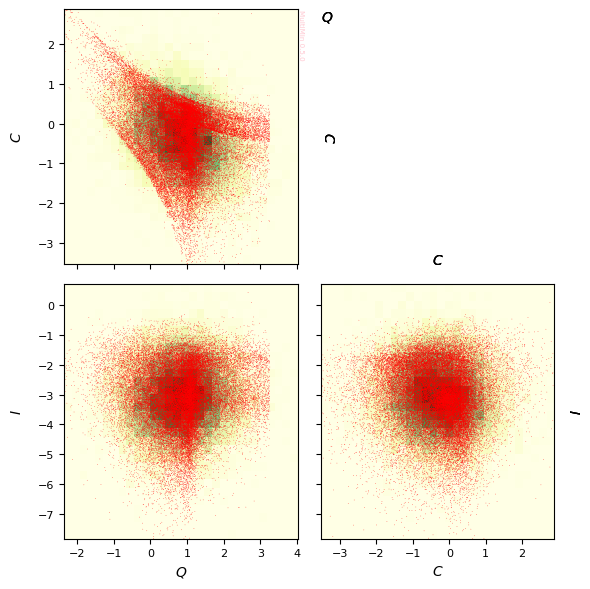

In [17]:
props=["Q","C","I"]
hargs=dict(bins=30,cmap='YlGn')
sargs=dict(s=0.2,edgecolor='None',color='r')
G=F.plot_fit(props=props,hargs=hargs,sargs=sargs,figsize=3)

plt.savefig('gallery/multimin_indepth_5.png')


Since a fitting process may be a very long process it is useful to store the result:

In [18]:
F.save_fit(f"gallery/fit-single.pkl",useprefix=False)

If you have the result you may load it afterwards here or in another notebook:

In [19]:
F=mn.FitCMND(f"gallery/fit-single.pkl")
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8496203785723826, -0.3191304296041239, -3.068268372241481]]
    Standard deviations (σ): [[0.8564118847530562, 0.8650963727754457, 1.0685264935256227]]
    Correlation coefficients (ρ): [[-0.31308599923961844, 0.0394771293218068, -0.06183872310662786]]

    Covariant matrices (Σ): 
        [[[0.733441316346282, -0.23195878414156523, 0.03612547320513912], [-0.23195878414156523, 0.7483917341892329, -0.05716237953768938], [0.03612547320513912, -0.05716237953768938, 1.1417488673661627]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8496203785723826, -0.3191304296041239, -3.068268372241481, 0.733441316346282, -0.23195878414156523, 0.03612547320513912, 0.7483917341892329, -0.05716237953768938, 1.1417488673661627]
        With std. and correlat

Let's try with two MND:

Iterations:
Iter 0:
	Vars: [0.5, 0.5, 2.6, 1.8, -1.7, 2.6, 1.7, -1.6, -1.2, -1.1, -1.6, -1.3, -1.2, -1.5, 2.9, 1.8, 1.9, 1.6, 1.8, 1.7]
	LogL/N: 5.409224359879989
Iter 5:
	Vars: [-75, 0.52, 2.6, 0.051, -3.3, 0.91, -0.38, -3, -1.4, -2.4, -2.3, -2.4, -2.3, -2.1, 2.6, 2.2, 0.66, -0.65, 0.098, -0.14]
	LogL/N: 3.973067510300329
Iter 8:
	Vars: [-75, 0.52, 2.6, 0.1, -3.2, 0.85, -0.32, -3.1, -1.4, -2.4, -2.3, -2.4, -2.4, -2.1, 2.6, 2.1, 0.7, -0.65, 0.078, -0.12]
	LogL/N: 3.968908876320057
Elapsed time since last call: 1.18621 s
-log(L)/N = 3.968908876320057
Composition of Ngauss = 2 gaussian multivariates of Nvars = 3 random variables:
    Weights: [6.169245211786519e-33, 1.0]
    Number of variables: 3
    Averages (μ): [[2.6418190659026513, 0.10078059130876679, -3.226059988327391], [0.8496788004840222, -0.3219045691165569, -3.0706993942777663]]
    Standard deviations (σ): [[1.9672451755860965, 0.8281483537812933, 0.9376966781488583], [0.856401627109287, 0.8642803948541298, 1.068065010924646

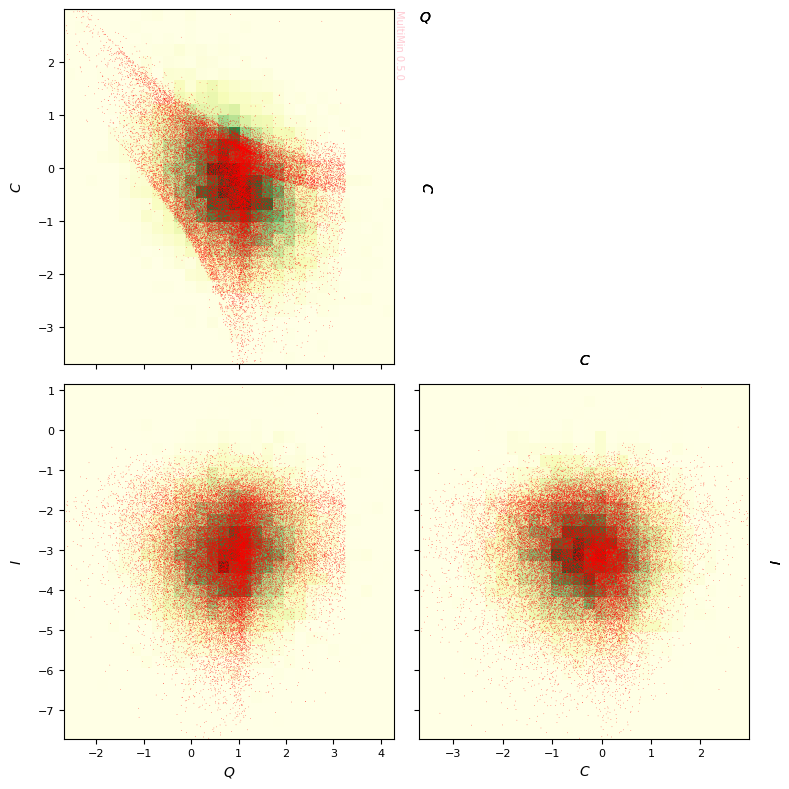

In [20]:
F=mn.FitCMND(Ngauss=2,Nvars=3)

mn.Util.el_time(0)
F.fit_data(udata,advance=5)
mn.Util.el_time()
F.save_fit(f"gallery/fit-multiple.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)

G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"gallery/fit-multiple-{F.prefix}.png")

Notice that by using two multinormals you now obtain a better value of the $\log {\cal L}$.

You can also fit setting bounds in parameters to avoid divergences:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.6, 1.7, -1.7, 2.5, 1.7, -1.6, -1.2, -1.1, -1.6, -1.3, -1.2, -1.5, 2.9, 1.8, 1.9, 1.6, 1.8, 1.7]
	LogL/N: 5.406842805287293
Iter 5:
	Vars: [2, 2, 0.95, -0.49, -3.1, 0.75, -0.096, -3, -2.9, -2.4, -2.3, -2.1, -2.4, -2, -0.19, 0.4, -0.53, -0.93, -0.054, 0.28]
	LogL/N: 3.9172471928433676
Iter 10:
	Vars: [0.66, 2, 0.84, -0.74, -3.5, 0.88, -0.01, -2.8, -3, -2.3, -2, -2.1, -2.6, -2.3, -0.32, 0.39, -0.65, -1.1, -0.048, -0.24]
	LogL/N: 3.8615208365443454
Iter 11:
	Vars: [0.66, 2, 0.84, -0.74, -3.5, 0.88, -0.01, -2.8, -3, -2.3, -2, -2.1, -2.6, -2.3, -0.32, 0.39, -0.65, -1.1, -0.048, -0.24]
	LogL/N: 3.8615208365443454
Elapsed time since last call: 3.06928 s
-log(L)/N = 3.8615208365443454
Composition of Ngauss = 2 gaussian multivariates of Nvars = 3 random variables:
    Weights: [0.4285856886686306, 0.5714143113313693]
    Number of variables: 3
    Averages (μ): [[0.8365994048730206, -0.7431552361083081, -3.4567697950138707], [0.8755233062915186, -0.0103860

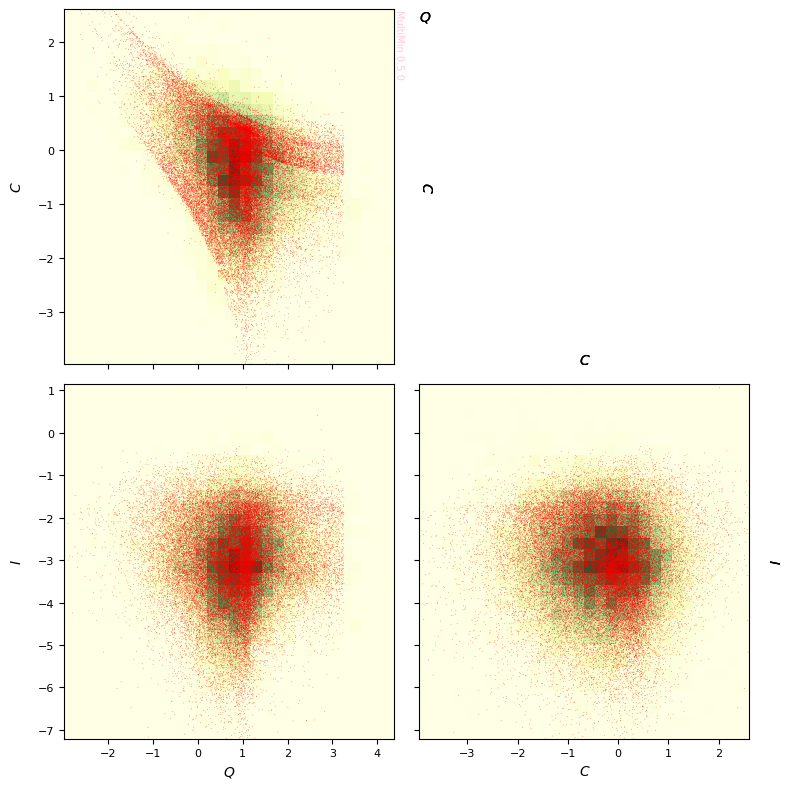

In [21]:
F=mn.FitCMND(Ngauss=2,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

mn.Util.el_time(0)
F.fit_data(udata,advance=5,bounds=bounds)
mn.Util.el_time()
F.save_fit(f"gallery/fit-multiple-bounds.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"gallery/fit-multiple-bounds-{F.prefix}.png")

Five gaussians:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, -1.3, -1.2, -1.7, -1.3, -1.2, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.5, -1.4, -1.3, -1.4, 3.6, 1.7, 1.9, 2.5, 2.3, 2.1, 2, 2.1, 1.9, 1.6, 1.6, 1.7, 1.6, 1.6, 1.6]
	LogL/N: 5.38620993132414
Iter 10:
	Vars: [-0.69, 0.18, -1.1, -0.23, -0.47, 1.6, -0.1, -3, 1, -0.77, -2.7, 1.3, -1, -3.7, 0.8, 0.35, -3.5, -0.22, -0.16, -2.7, -2.3, -3.5, -2.4, -3.3, -2.7, -2.4, -2.5, -2.3, -1.8, -2.8, -3.4, -2.2, -2.7, -2.1, -2.3, -0.05, 0.36, 0.49, -0.22, 0.51, -0.24, -0.24, 1.5, -0.41, -1.7, -0.022, 0.31, -2.3, -0.1, 0.21]
	LogL/N: 3.73575317344461
Iter 16:
	Vars: [-0.76, 0.37, -1.3, -0.65, -0.15, 1.6, 0.067, -3.1, 1, -0.62, -2.8, 1.4, -0.79, -3.6, 0.68, 0.42, -3.6, -3.7e-05, -0.53, -2.7, -2.4, -3.6, -2.5, -3.3, -2.8, -2.3, -2.4, -2.5, -1.7, -2.8, -3.3, -2.1, -2.5, -2, -2.3, -0.95, 0.35, 0.48, -0.62, 0.6, -0.41, -0.26, 1.7, -0.1, -2.1, -0.2, 0.32, -2.5, -0.12, 0.31]
	LogL/N: 

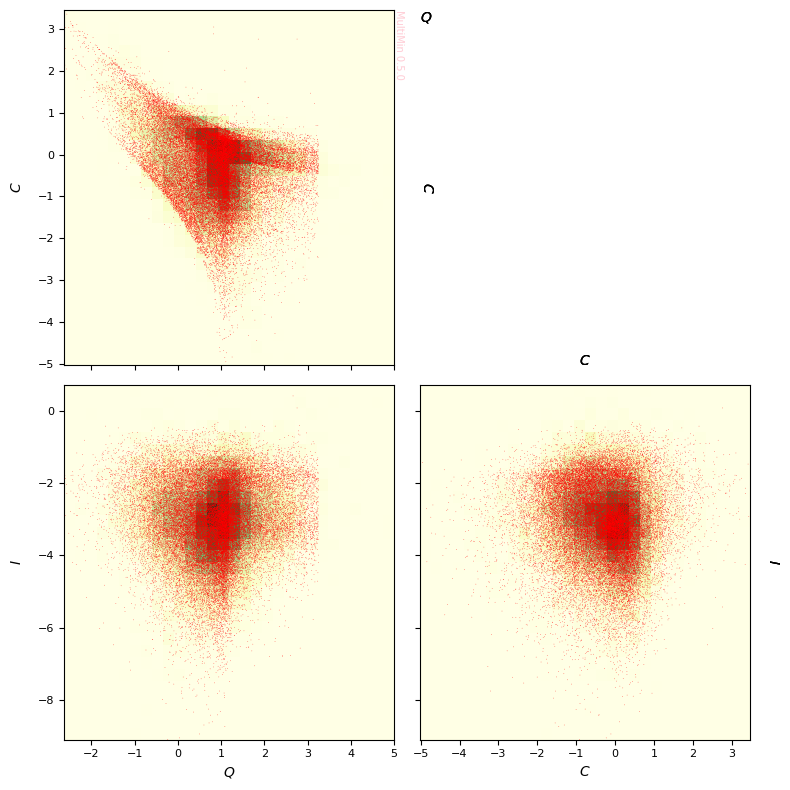

In [22]:
F=mn.FitCMND(Ngauss=5,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

mn.Util.el_time(0)
F.fit_data(udata,advance=10,bounds=bounds)
mn.Util.el_time()
F.save_fit(f"gallery/fit-multiple-bound_mus.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"gallery/fit-multiple-bound_mus-{F.prefix}.png")

As you can see the fitting parameter $-\log{\cal L}$ is improved with respect to previous fit. 

You can verify that the fit is capturing the details of the distribution by generating and plotting a mock distribution:

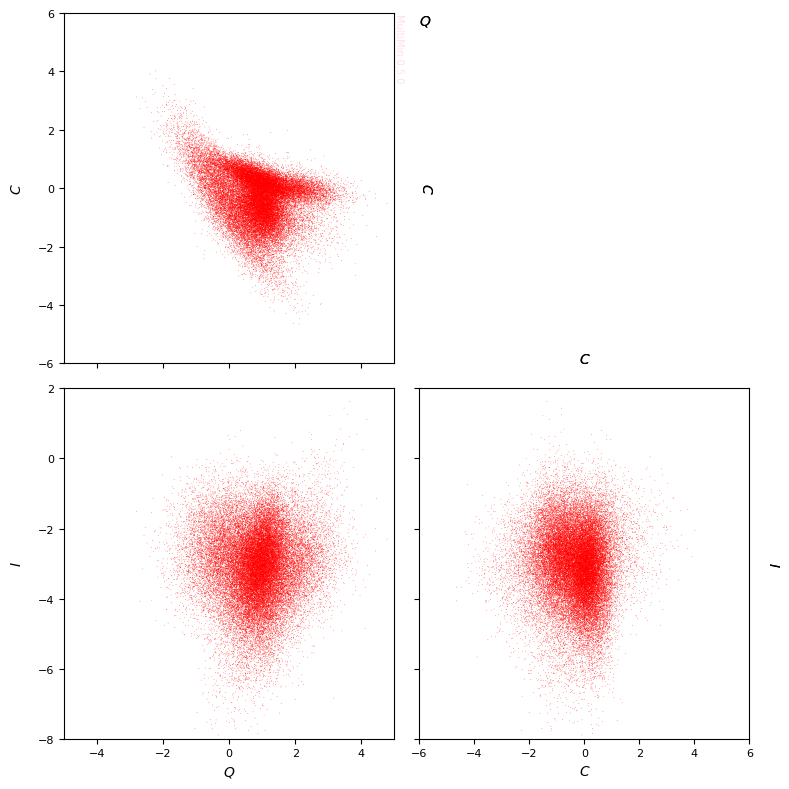

In [23]:
F.cmnd.plot_sample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"gallery/sample-multiple-{F.prefix}.png")

Compare this with the original distribution:

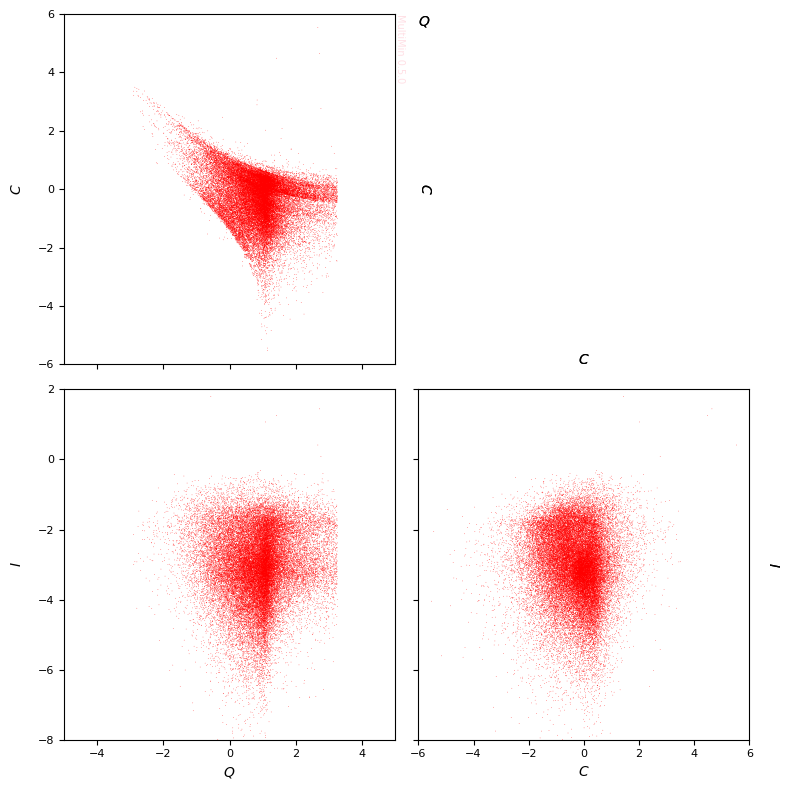

In [24]:
properties=dict(
    Q=dict(label=r"$Q$",range=[-5,5]),
    C=dict(label=r"$C$",range=[-6,6]),
    I=dict(label=r"$I$",range=[-8,2]),
)
G=mn.CornerPlot(properties,figsize=4)
sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(udata,**sargs)
G.fig.savefig("gallery/true-MPCsample.png")

Let's try with 20 MND:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, -1.4, -1.2, -1.9, -1.3, -1.2, -1.8, -1.4, -1.3, -1.8, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.5, -1.4, -1.3, -1.8, -1.4, -1.4, -1.3, -1.4, -1.3, -2, -1.4, -1.4, -1.2, -1.4, -1.3, -3.4, 4.8, 1.6, 1.7, 3.9, 1.7, 1.9, 3.4, 1.9, 2.2, 3.1, 2.1, 2.2, 2.8, 2.3, 2.3, 2.6, 2.5, 2.2, 2.4, 2.6, 2.2, 2.3, 2.4, 2.1, 2.1, 2.3, 2, 2, 2.1, 2, 1.8, 1.9, 1.9, 1.7, 1.8, 1.9, 1.7, 1.7, 1.8, 1.6, 

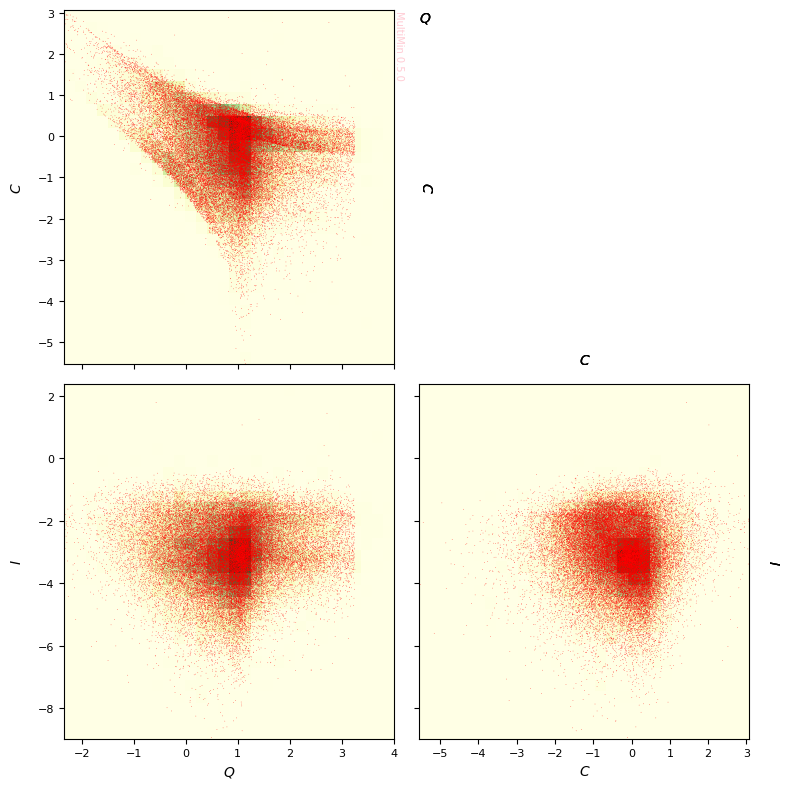

In [25]:
F=mn.FitCMND(Ngauss=20,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

mn.Util.el_time(0)
F.fit_data(udata,advance=10,bounds=bounds)
mn.Util.el_time()
F.save_fit(f"gallery/fit-multiple-bound_mus.pkl",useprefix=True)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"gallery/fit-multiple-bound_mus-{F.prefix}.png")

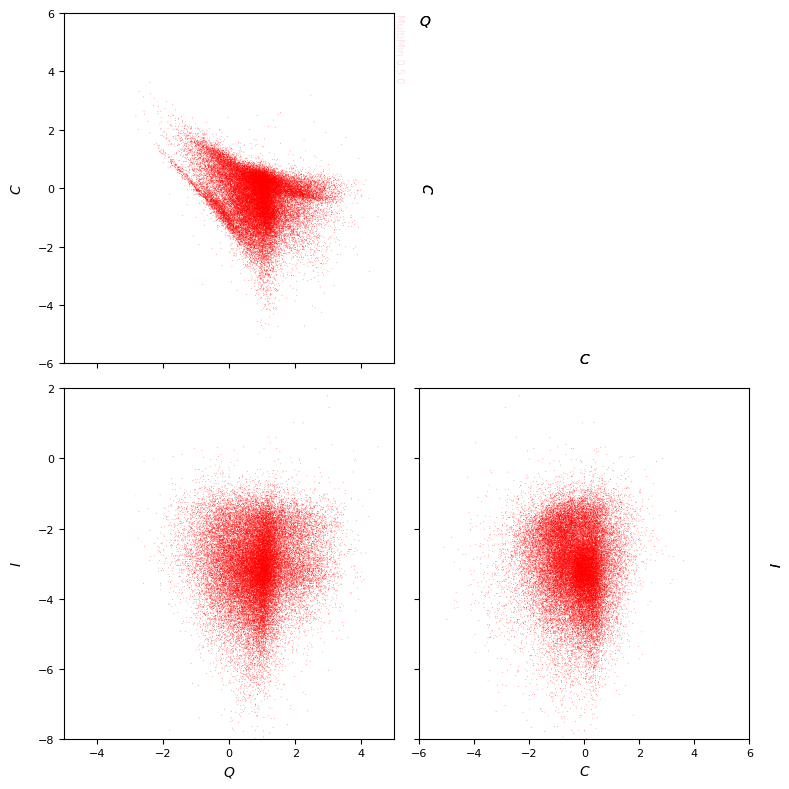

In [26]:
F.cmnd.plot_sample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"gallery/sample-multiple-{F.prefix}.png")

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga